# Teacher Attendance calculation

### 

### Import library

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

### Import dataset

In [2]:
f = open('course_schedules 1st_pro.json', encoding="utf8")

In [3]:
data = json.load(f)

In [4]:
df = pd.DataFrame(data)

In [5]:
df=df.loc[df['status'] == "completed"]

In [6]:
attendance=[]
Name=[]
present=[]
absent=[]
pending=[]
auto_a=[]
manual_a=[]
auto_p=[]
manual_p=[]


data=[]

In [7]:
for no ,session in df.iterrows():
    data.append(session["students"])
    for i in session["staffs"]:
        first=i["staff_name"]["first"]
        last=i["staff_name"]["last"]
        Name.append(" ".join([first, last]))
        present_=0
        absent_=0
        pending_=0
        auto_a_=0
        manual_a_=0
        auto_p_=0
        manual_p_=0
        for i in session["students"]:
            if i["status"]=="absent":
                absent_+=1
                try:
                    if i["mode"]=="auto":
                        auto_a_+=1
                    elif i["mode"]=="manual":
                        manual_a_+=1
                except:
                    continue 
                
            elif i["status"]=="pending":
                pending_+=1
            
            elif i["status"]=="present":
                present_+=1
                try:
                    if i["mode"]=="auto":
                        auto_p_+=1
                    elif i["mode"]=="manual":
                        manual_p_+=1
                except:
                    continue
        #status.append(" ".join([str(present_), str(absent_),str(pending_),str(auto_a_),str(manual_a_),str(auto_p_),str(manual_p_)]))
        present.append(str(present_))
        absent.append(str(absent_))
        pending.append(str(pending_))
        auto_a.append(str(auto_a_))
        manual_a.append(str(manual_a_))
        auto_p.append(str(auto_p_))
        manual_p.append(str(manual_p_))

In [8]:
len(Name),len(present),len(attendance)

(18195, 18195, 0)

In [9]:
df = pd.DataFrame(list(zip(Name,present,absent,pending,auto_a,manual_a,auto_p,manual_p)),columns =["Name","present","absent","pending","auto_a","manual_a","auto_p","manual_p"])

In [10]:
df['present'] = df['present'].astype(int)
df['absent'] = df['absent'].astype(int)
df['pending'] = df['pending'].astype(int)
df['auto_a'] = df['auto_a'].astype(int)
df['manual_a'] = df['manual_a'].astype(int)
df['auto_p'] = df['auto_p'].astype(int)
df['manual_p'] = df['manual_p'].astype(int)

In [11]:
staff=df.Name.unique()

In [12]:
names=[]
pie_nu=[]
per_num=[]
session=[]

In [13]:
for name in staff:
    names.append(name)
    Noor_df=df.loc[df['Name'] == name]
    s=Noor_df.shape
    s=str(s[0])
    session.append(s)
    y=Noor_df["auto_p"].sum(),Noor_df["manual_p"].sum()
    pie_nu.append(y)
    per=y[0]+y[1]
    per=(y[0]/per)*100
    per_num.append(per)

In [14]:
chart_data = pd.DataFrame(list(zip(names,session,pie_nu,per_num)),columns =["Name","Total_session","pie_num","per"])

In [15]:
chart_data

Name Total_session       pie_num   
0                       MARWA MOHAMED SAFWAT           170  (7462, 3863)  \
1                             MUAZZAM MAQBUL           130   (3541, 669)   
2                              Solafa Azzouz           210  (4817, 2015)   
3                             RUKHSANA SATAR           187   (2724, 505)   
4                              Asmaa Elbakry            93  (3509, 1633)   
..                                       ...           ...           ...   
166  Virtual Clinician19 Virtual Clinician19             1        (0, 9)   
167                           REHAB AL SALEH             3      (244, 1)   
168  Virtual Clinician49 Virtual Clinician49             1     (177, 15)   
169  Virtual Clinician35 Virtual Clinician35             3      (210, 9)   
170  Virtual Clinician43 Virtual Clinician43             1       (72, 1)   

           per  
0    65.889625  
1    84.109264  
2    70.506440  
3    84.360483  
4    68.241929  
..         ...  
166   0.000000  
167  99.591837  
168  92.187500  
169  95.890411  
170  98.630137  

[171 rows x 4 columns]

### 

# preprocessed data 

### 

In [16]:
chart_data=chart_data.sort_values(['per'])

In [17]:
chart_data.head()

Name Total_session   pie_num  per
155    Virtual Clinician4 Virtual Clinician4             2   (0, 65)  0.0
166  Virtual Clinician19 Virtual Clinician19             1    (0, 9)  0.0
125  Virtual Clinician31 Virtual Clinician31             1   (0, 11)  0.0
165                      Dr. Karunakar Bhoja             1   (0, 13)  0.0
152    Virtual Clinician5 Virtual Clinician5             6  (0, 300)  0.0

# 

# Pie chart view

# 

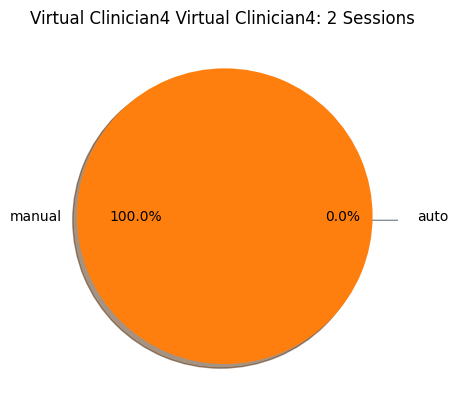

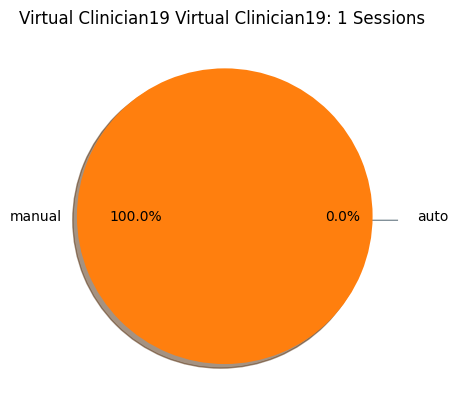

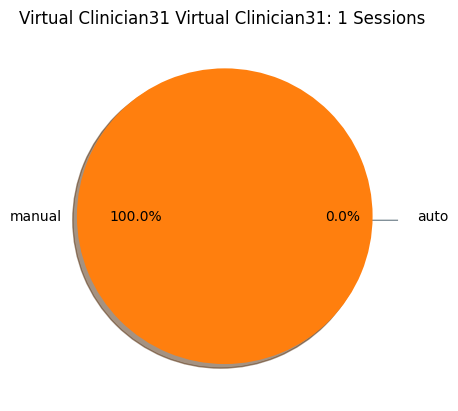

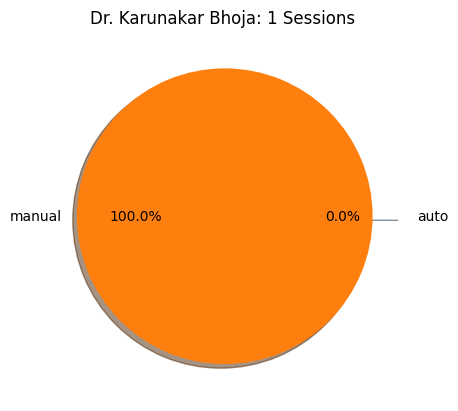

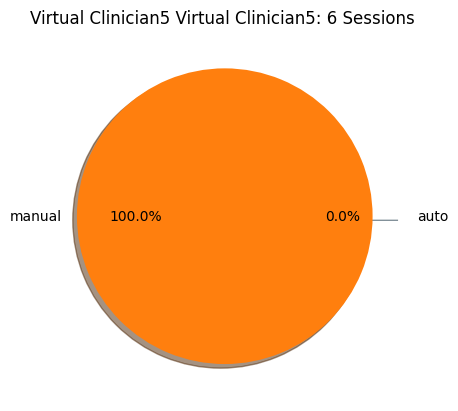

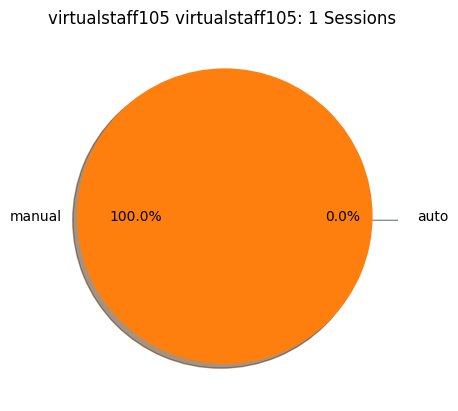

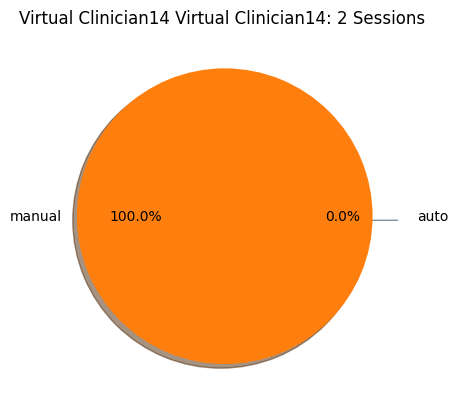

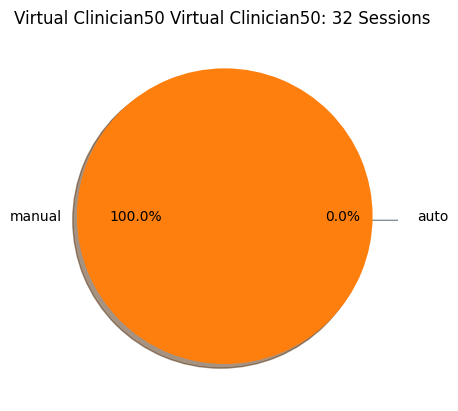

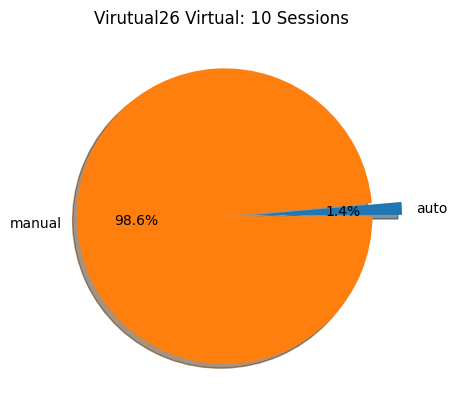

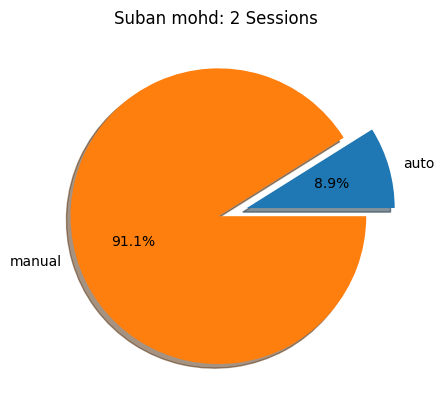

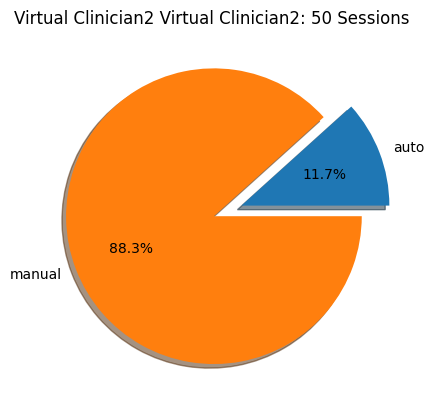

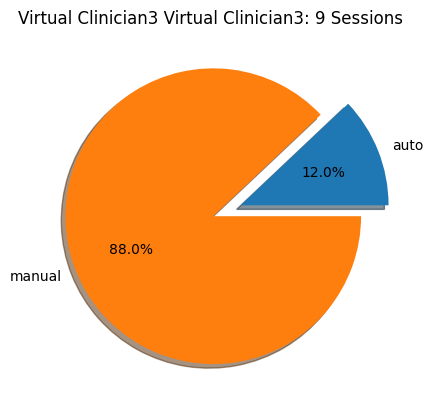

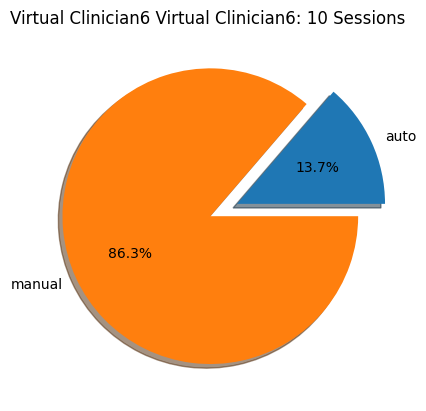

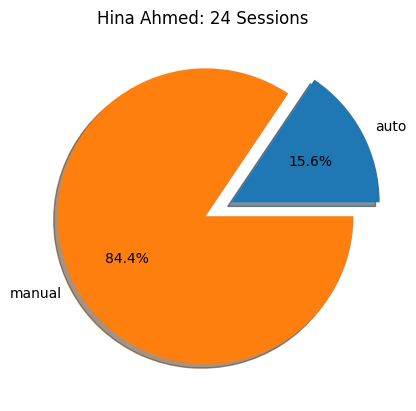

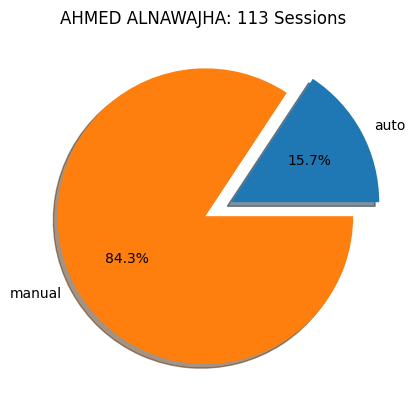

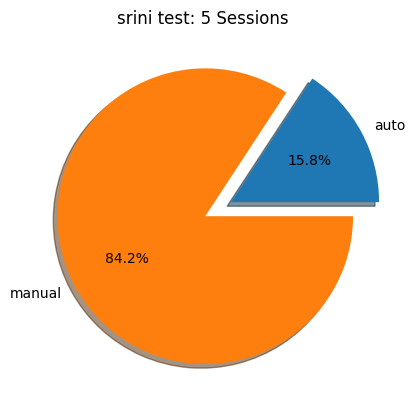

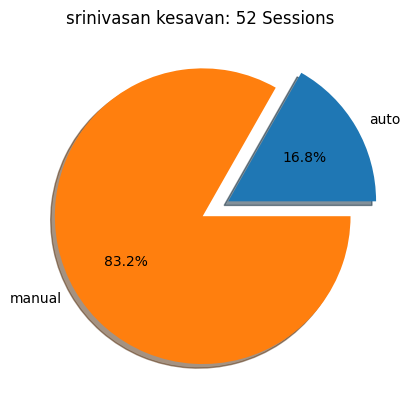

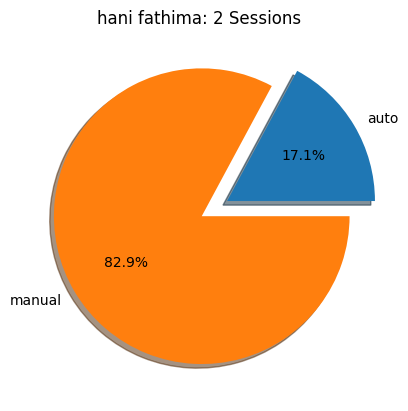

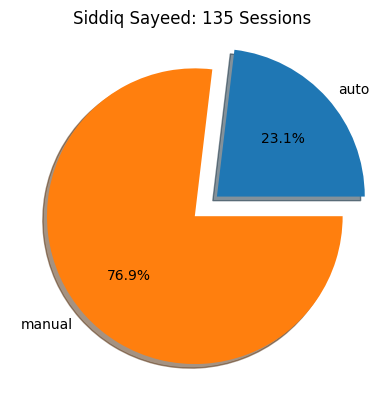

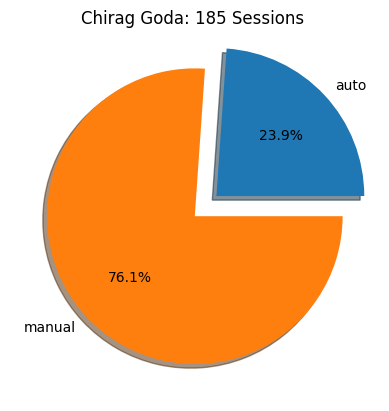

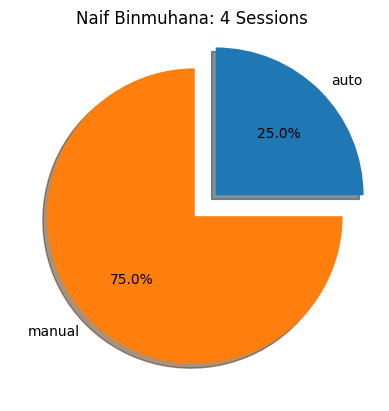

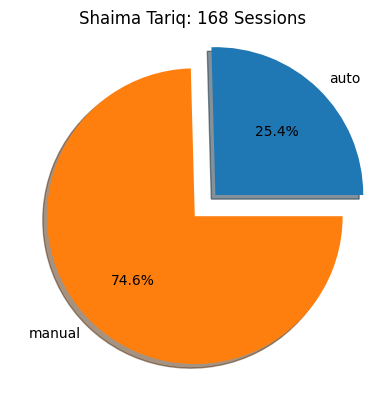

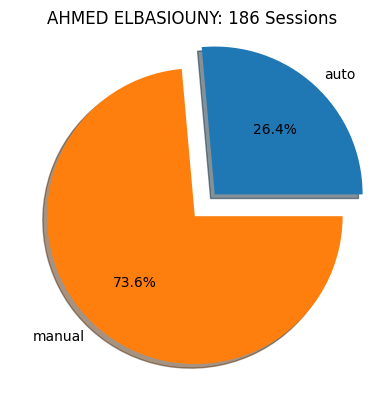

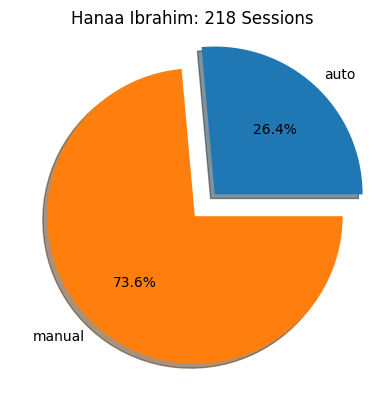

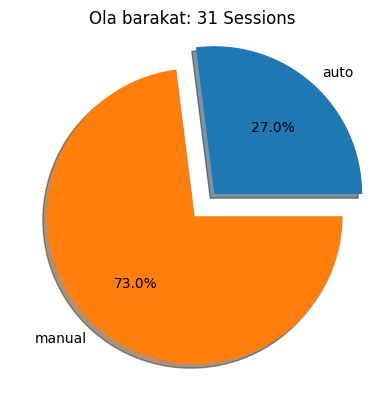

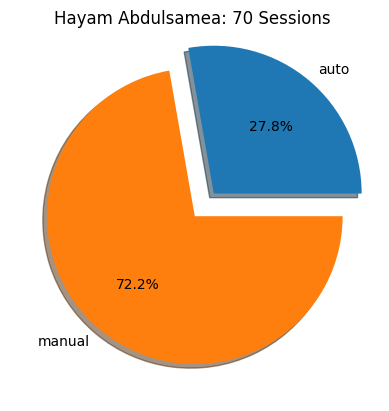

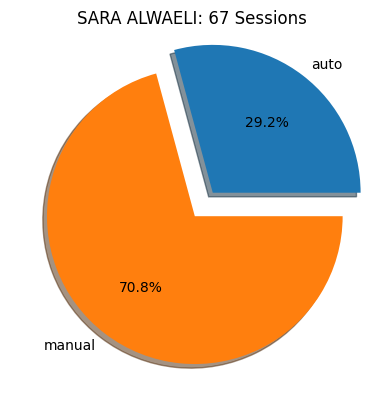

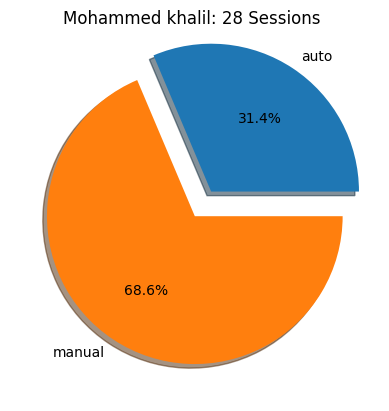

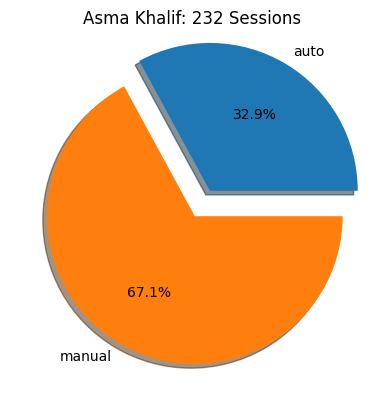

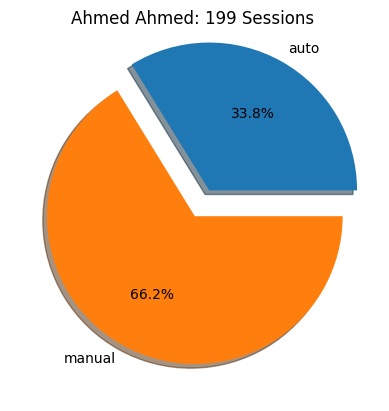

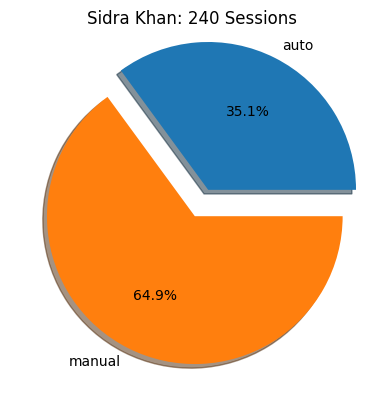

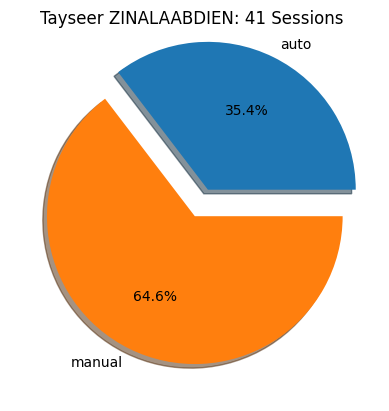

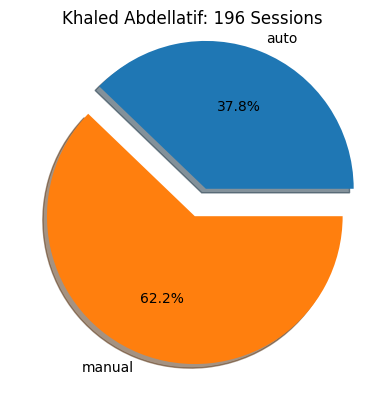

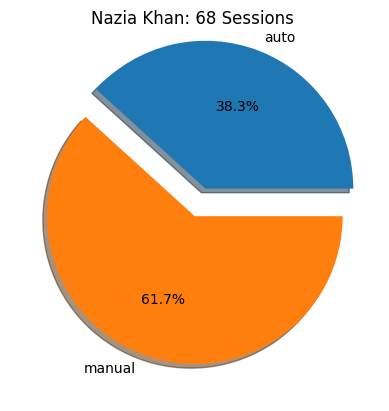

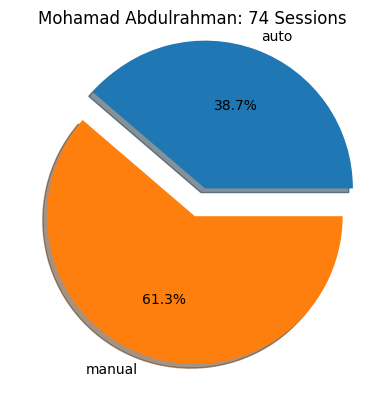

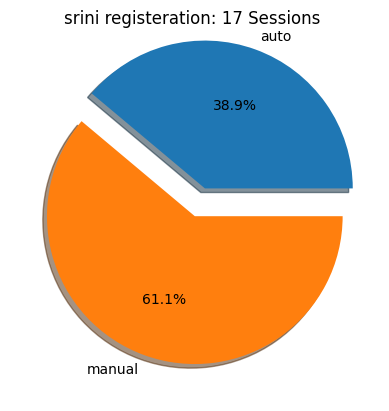

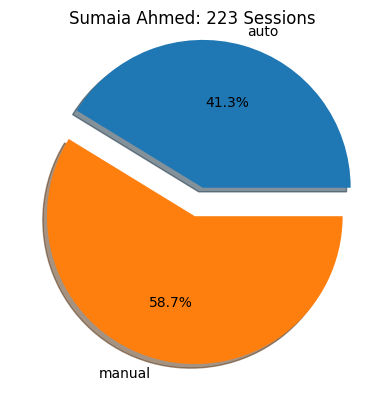

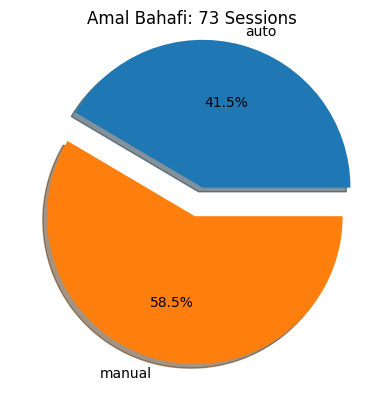

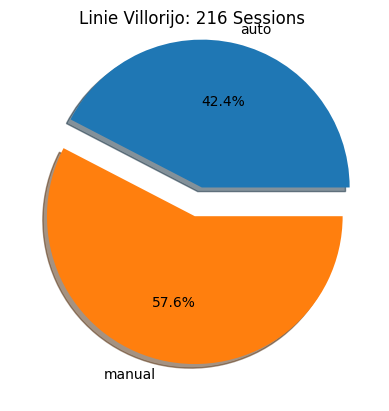

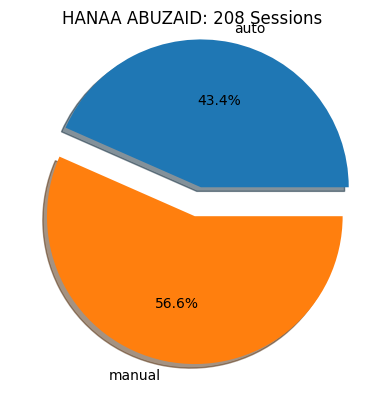

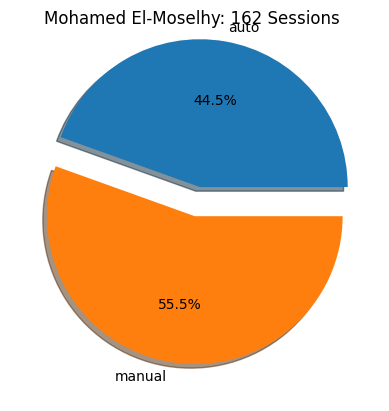

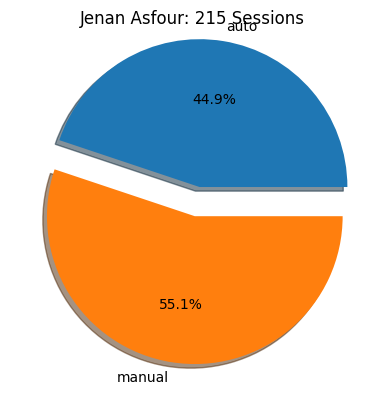

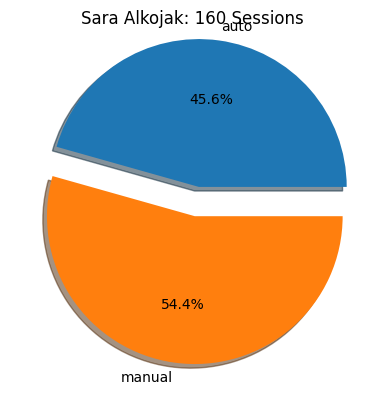

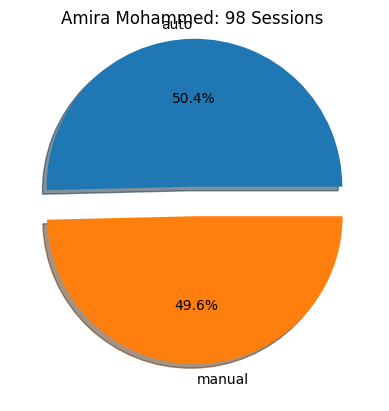

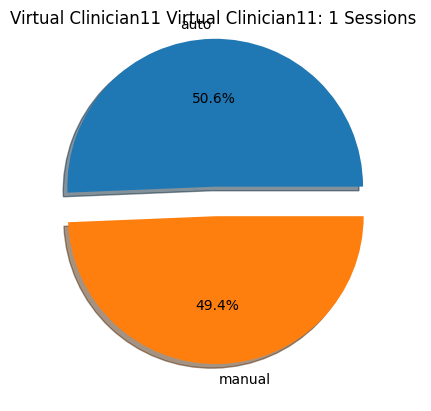

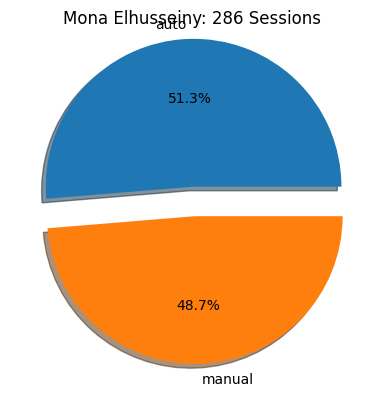

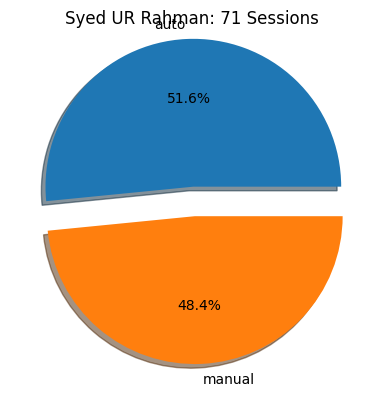

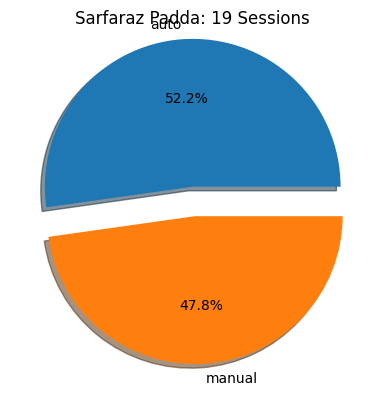

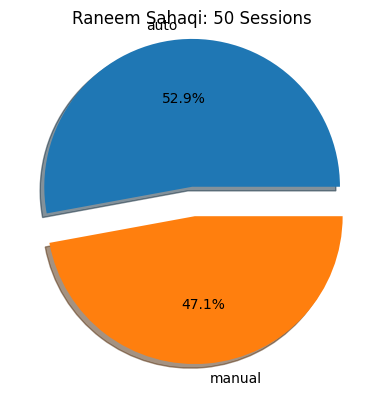

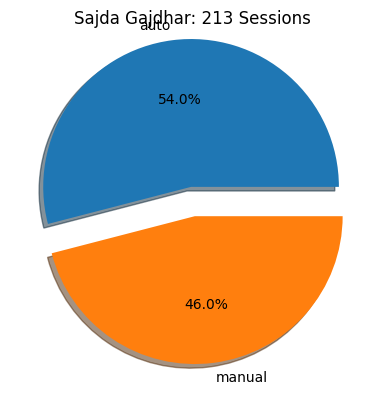

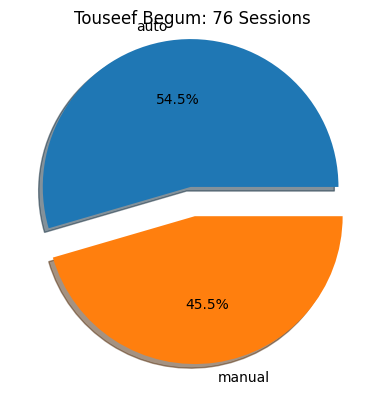

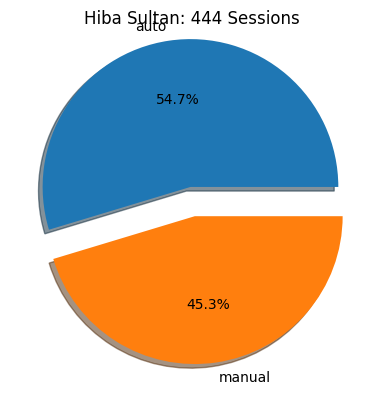

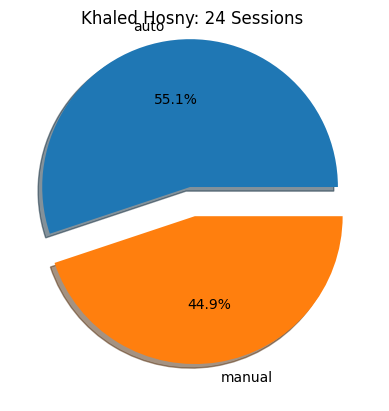

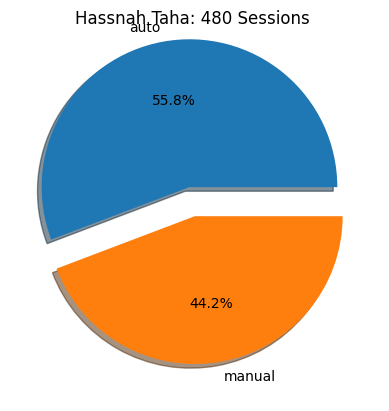

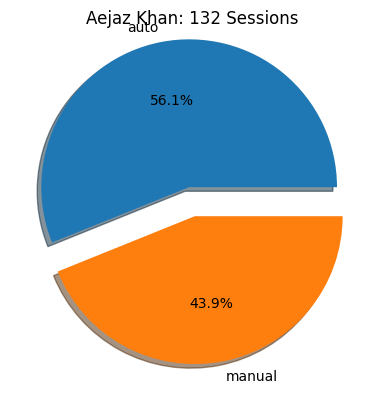

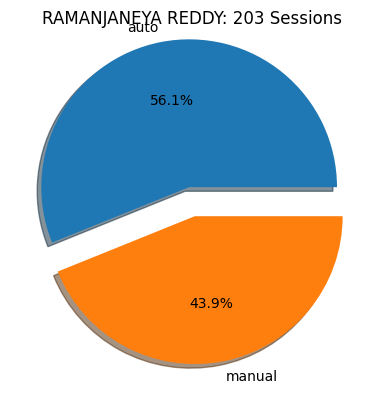

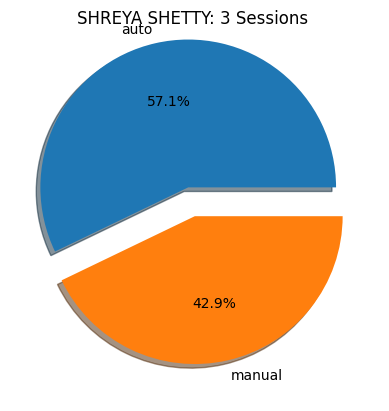

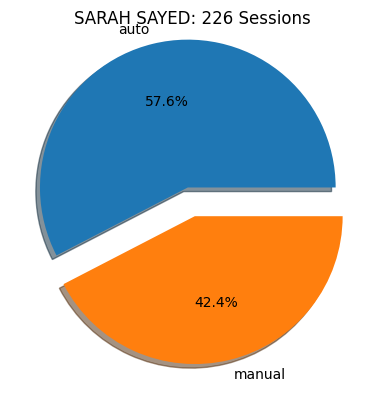

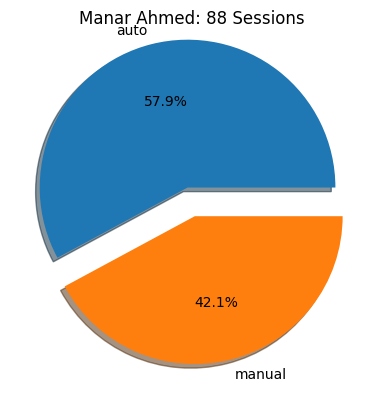

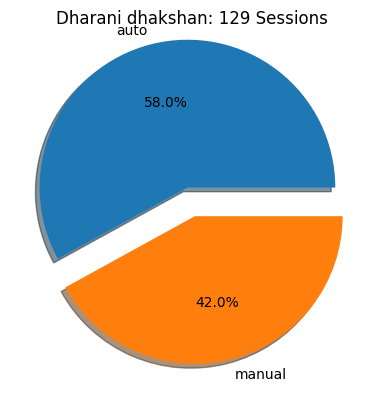

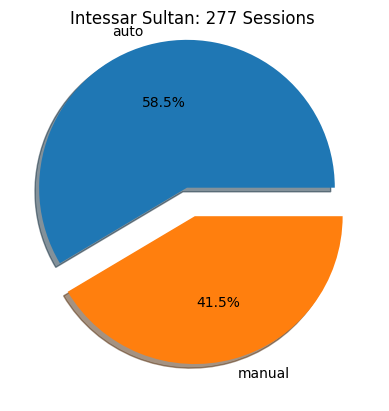

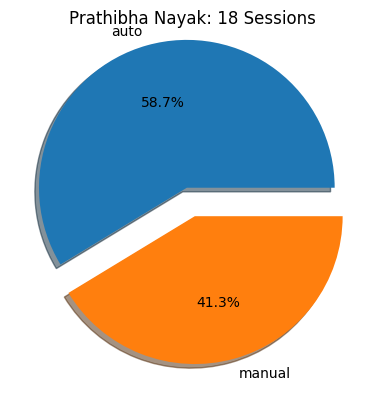

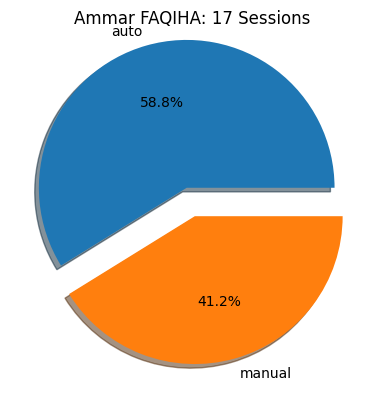

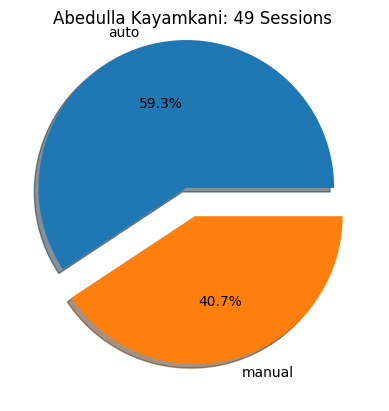

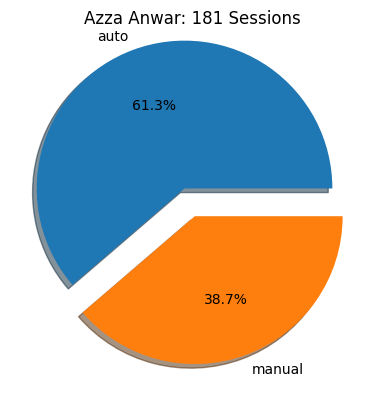

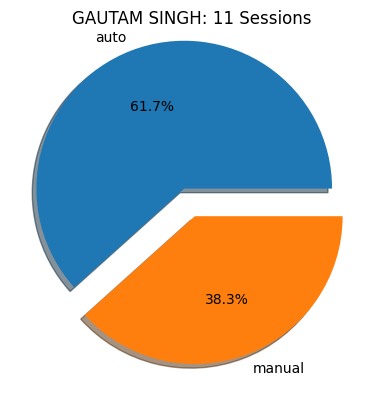

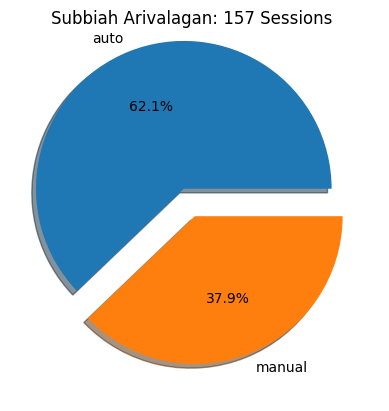

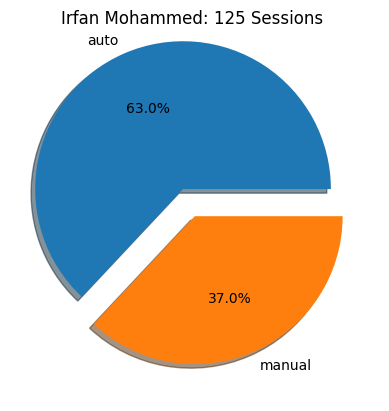

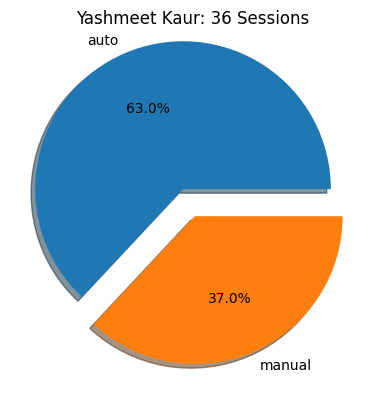

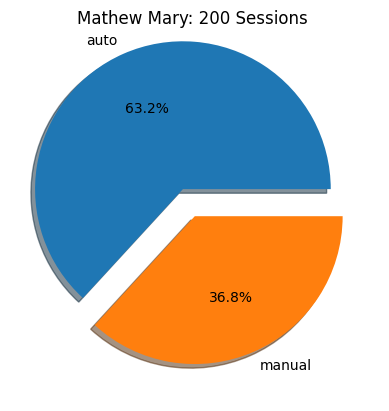

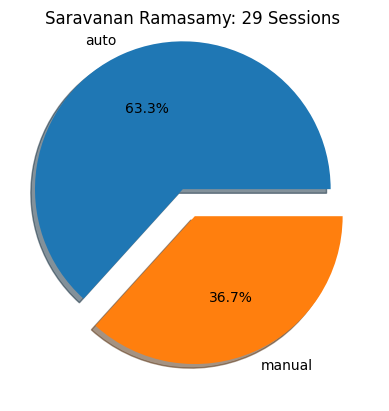

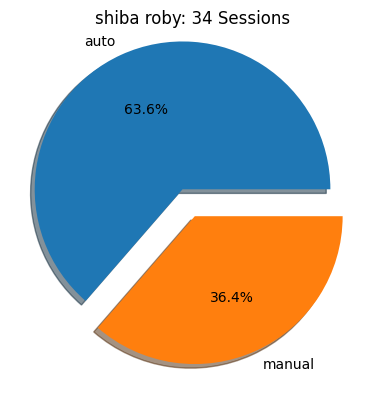

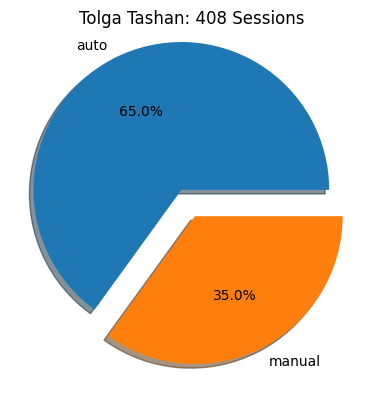

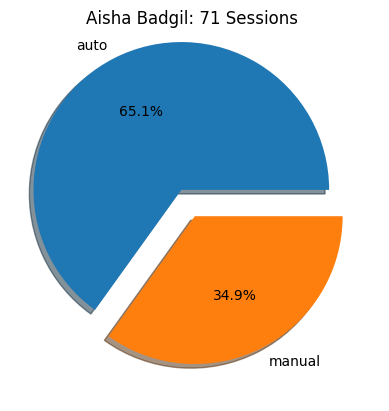

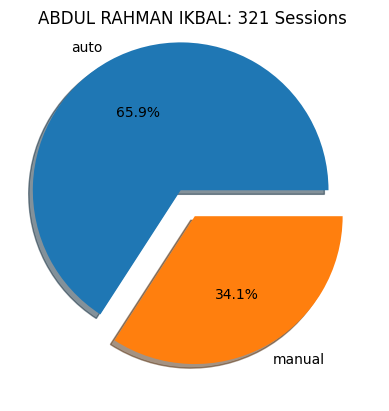

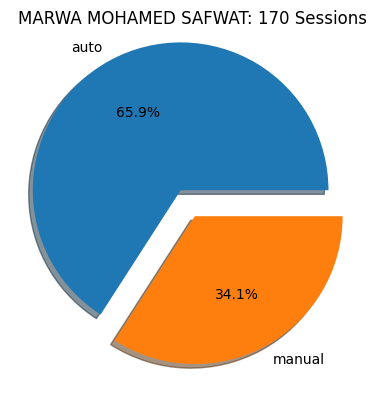

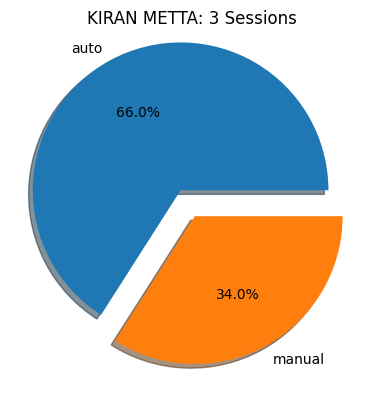

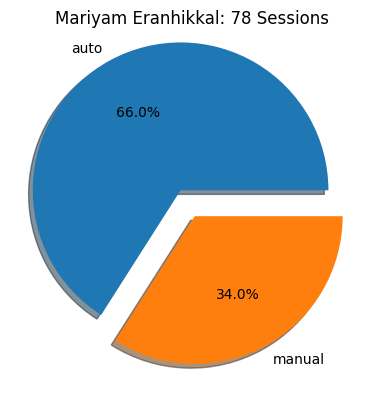

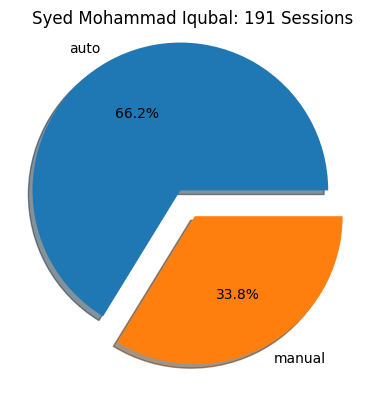

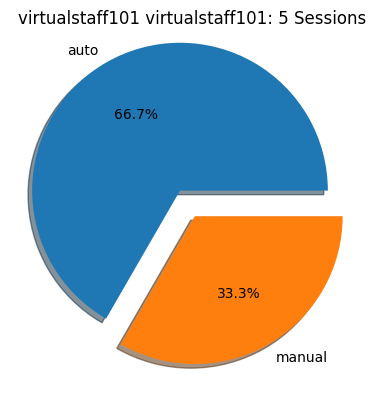

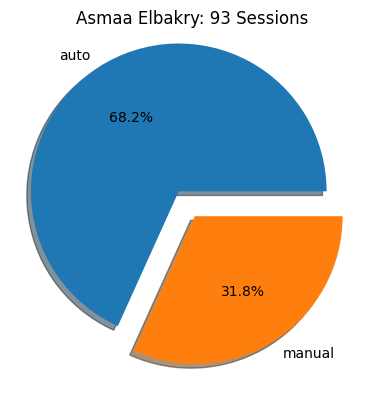

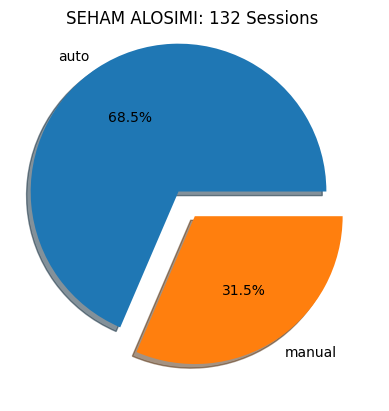

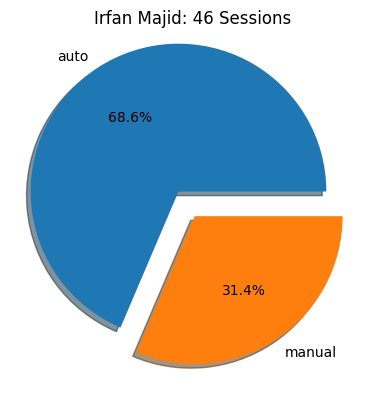

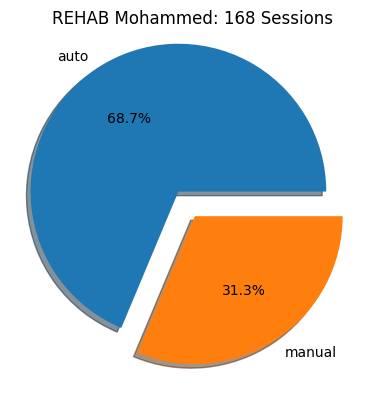

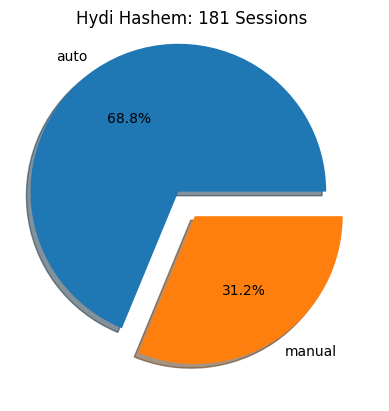

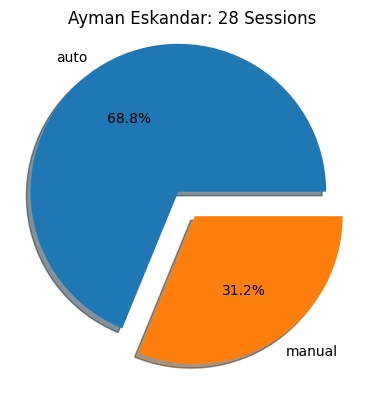

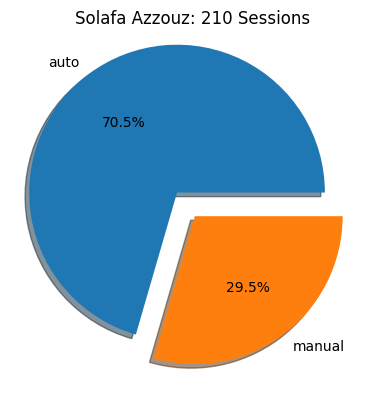

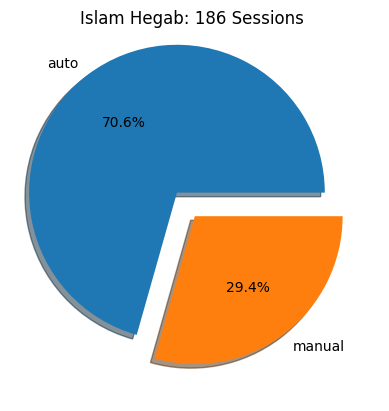

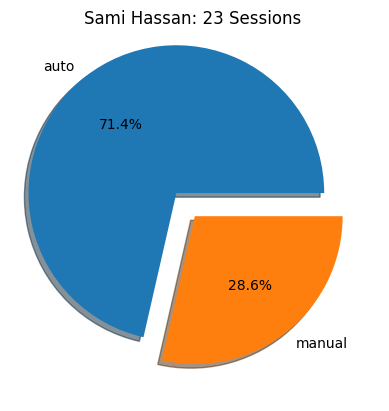

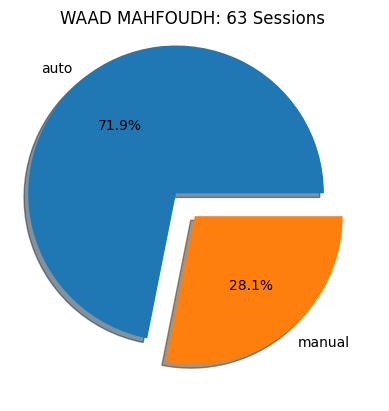

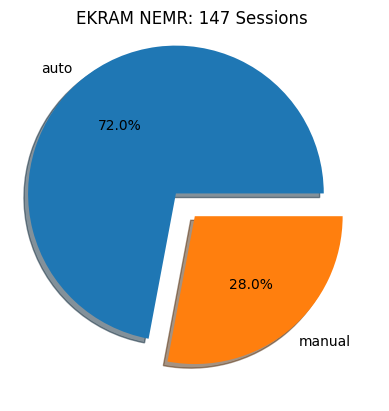

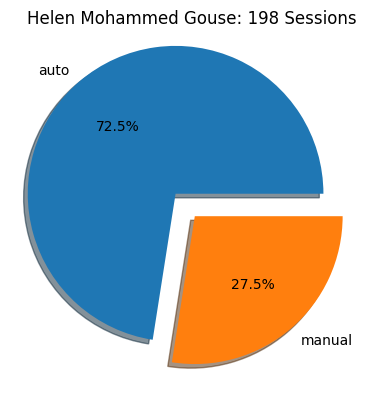

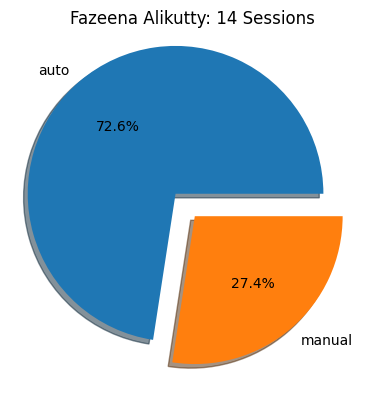

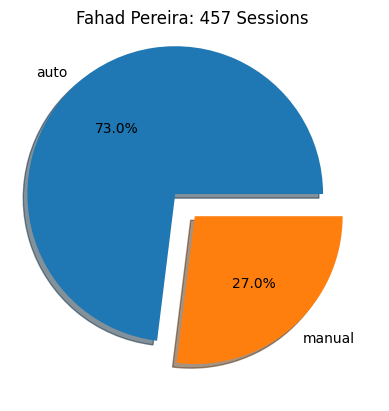

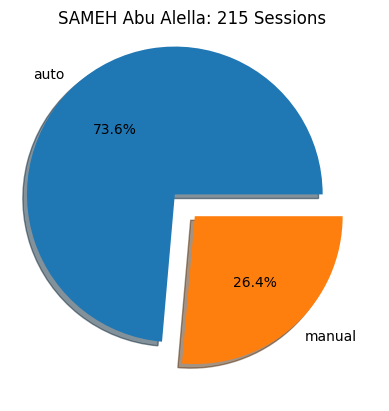

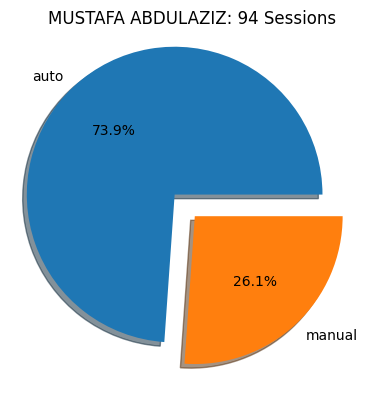

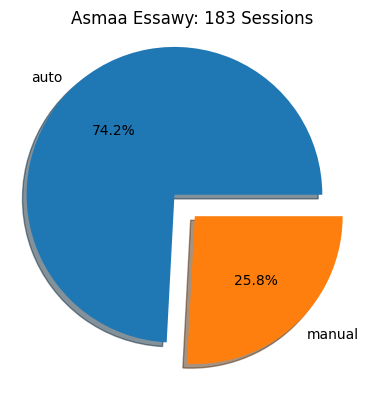

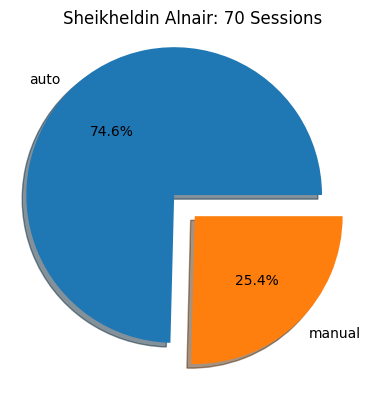

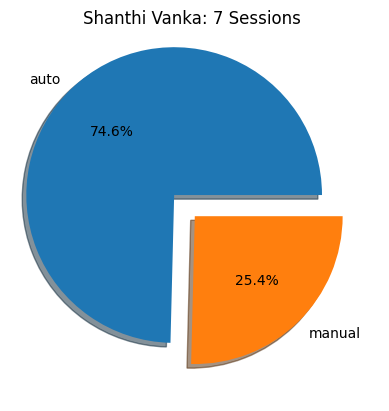

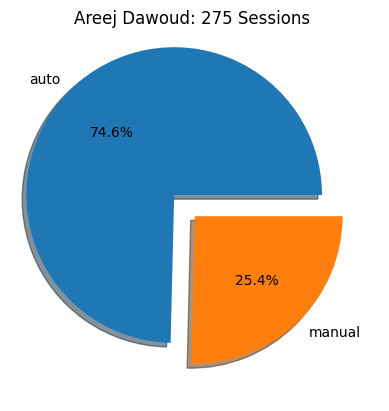

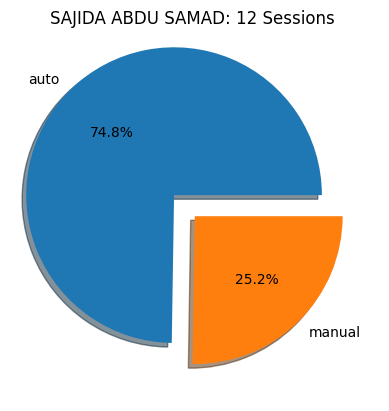

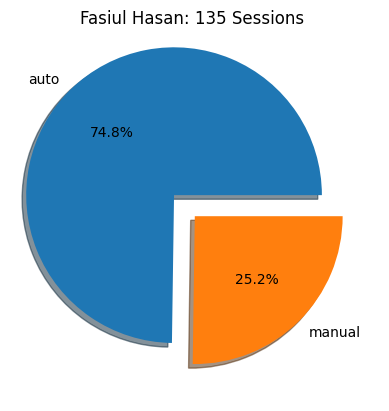

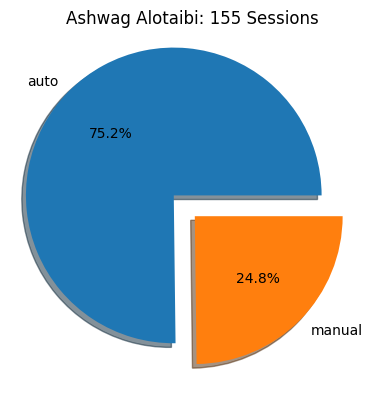

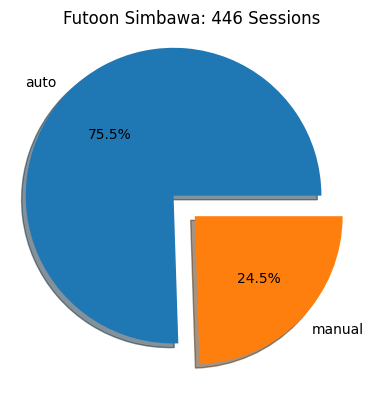

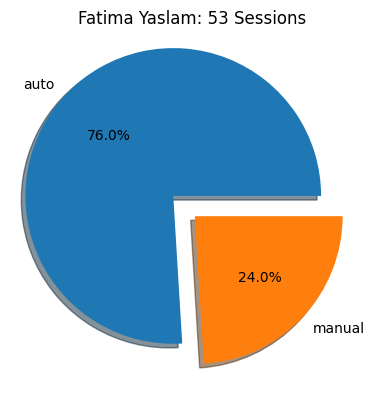

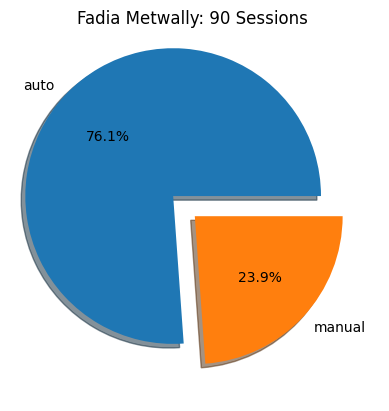

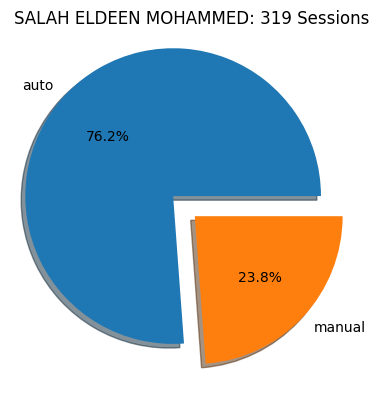

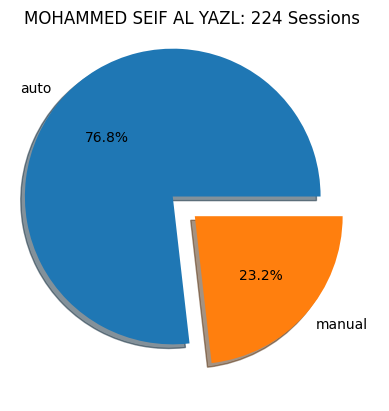

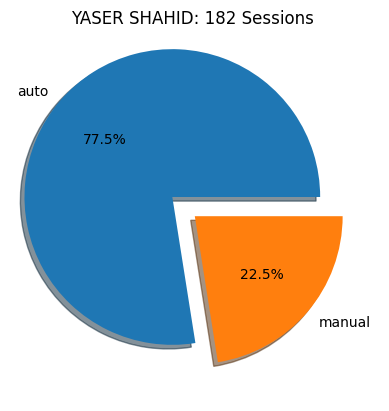

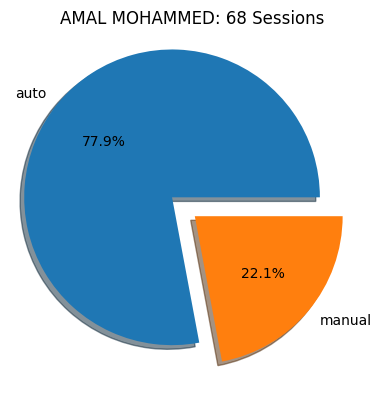

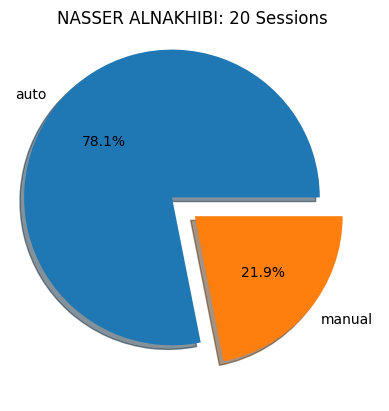

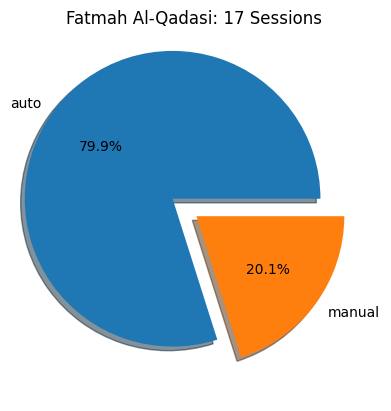

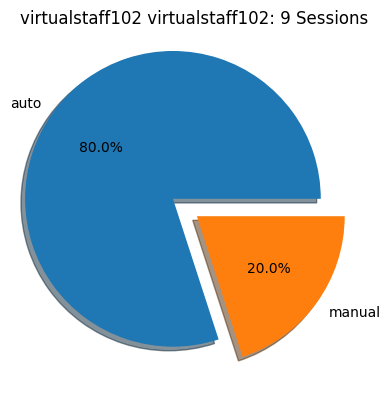

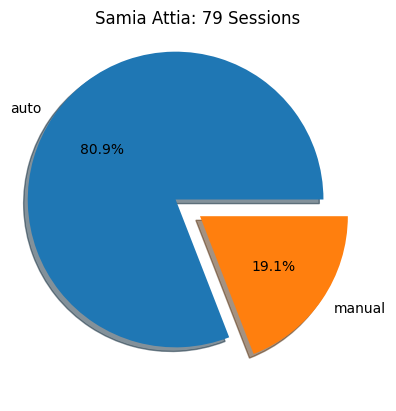

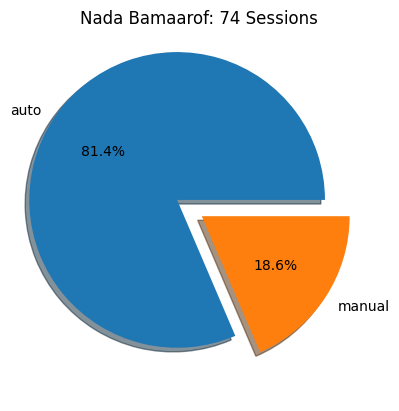

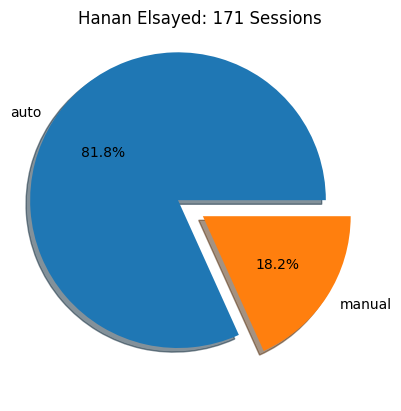

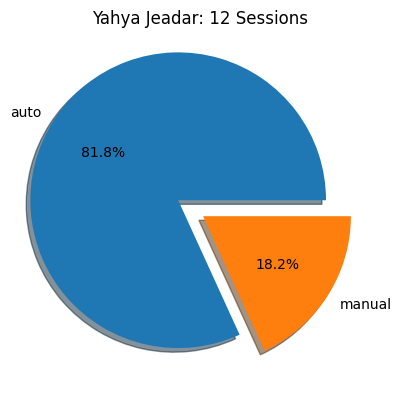

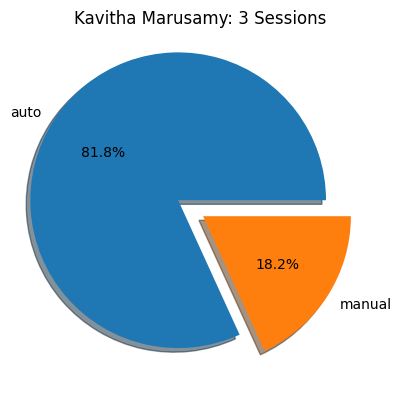

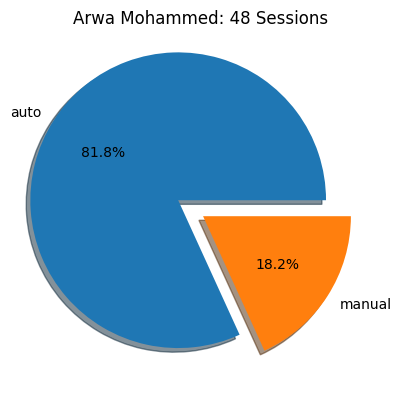

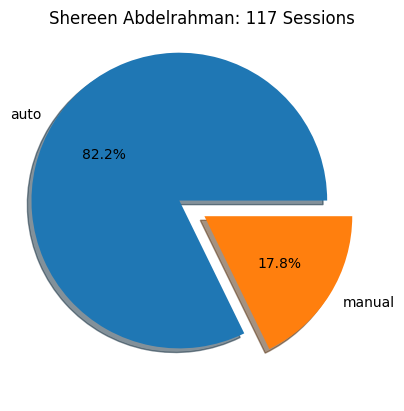

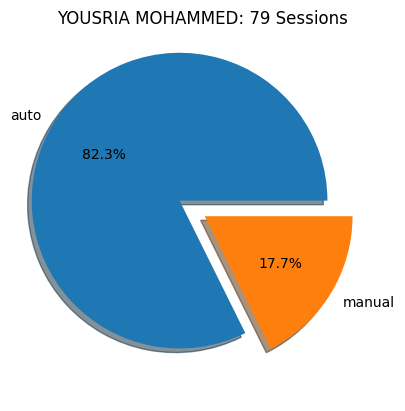

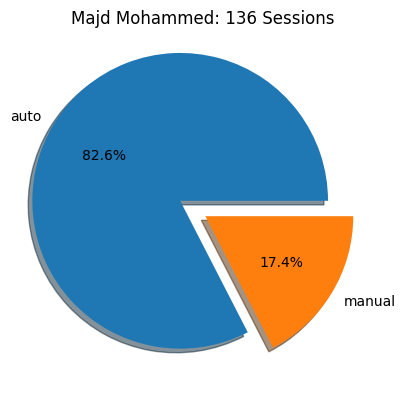

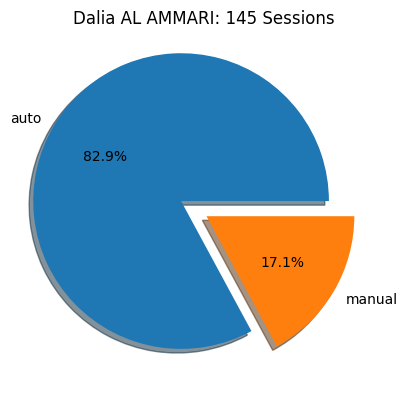

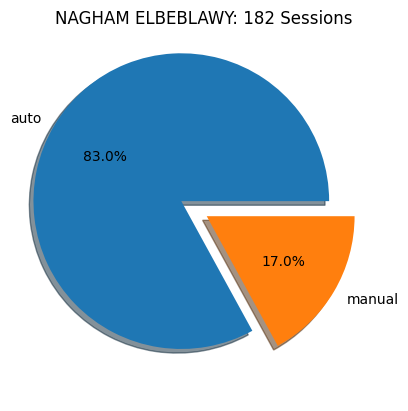

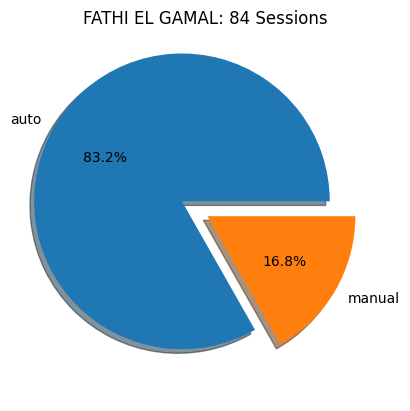

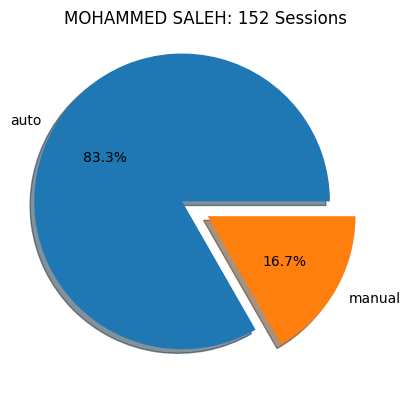

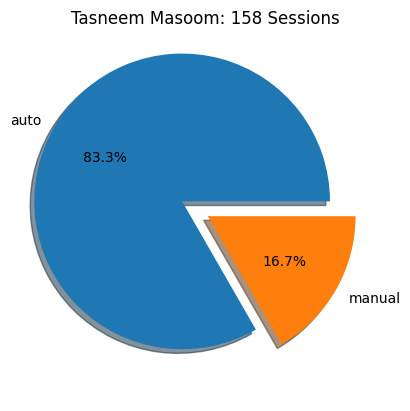

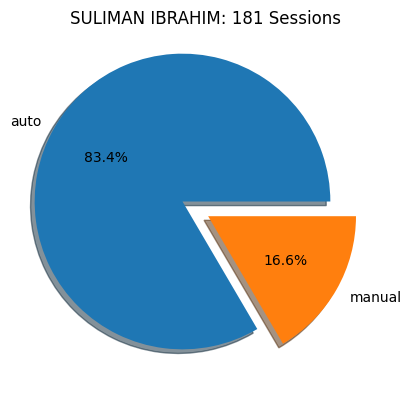

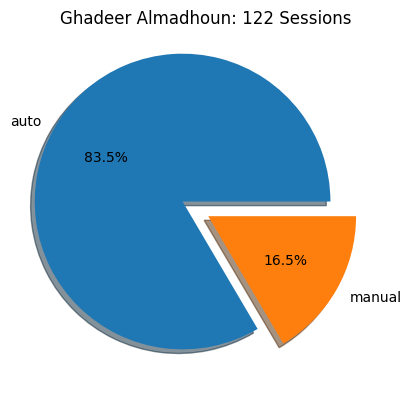

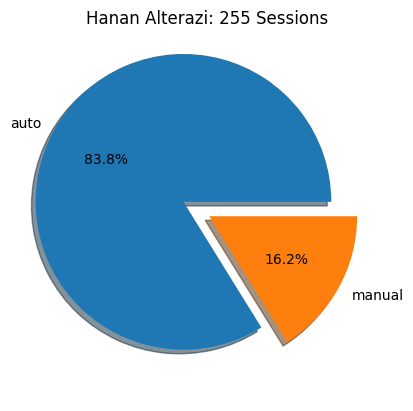

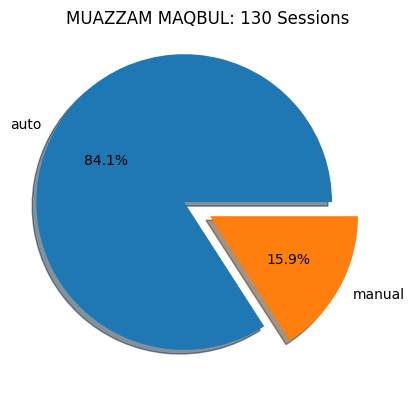

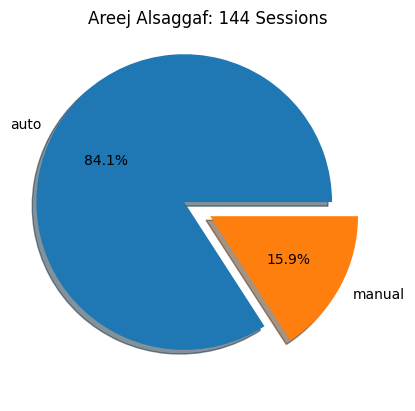

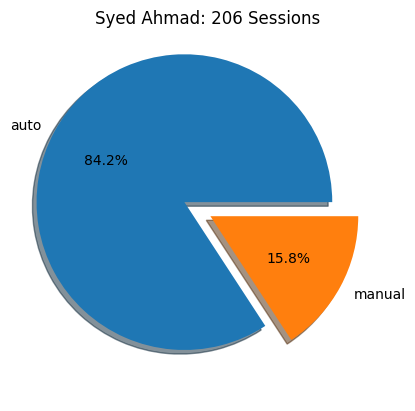

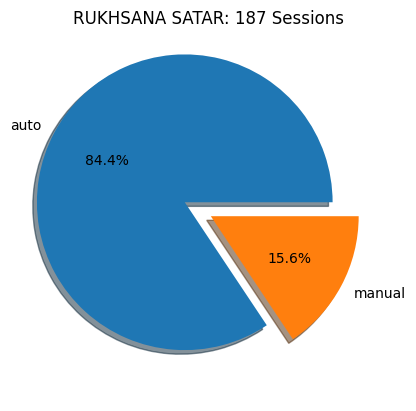

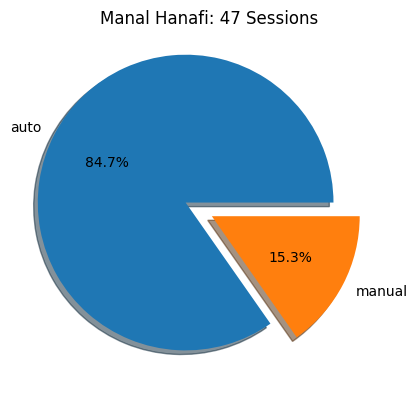

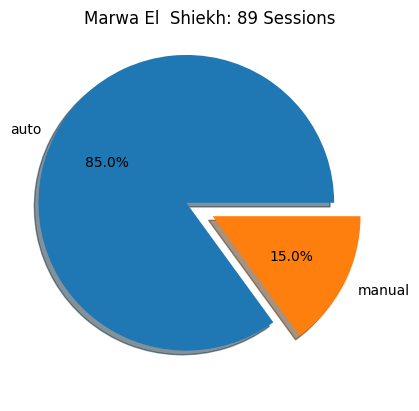

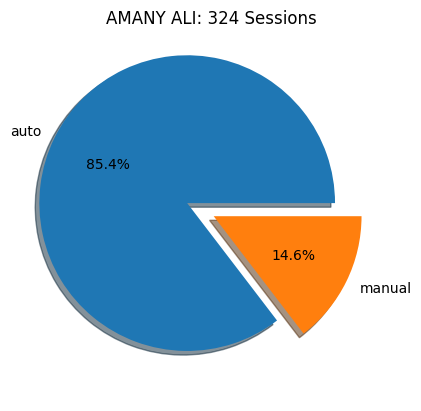

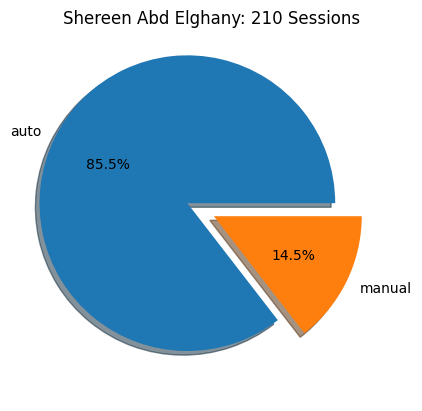

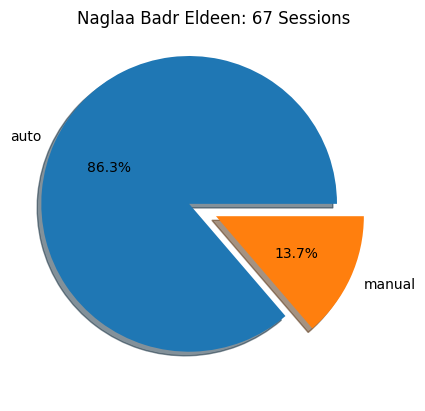

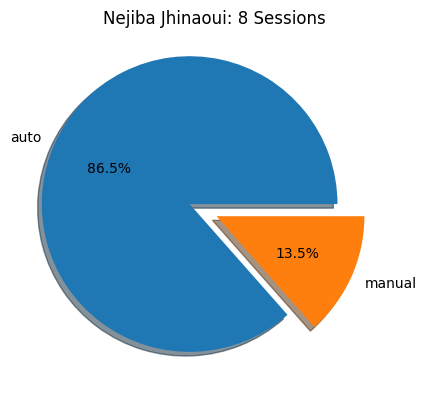

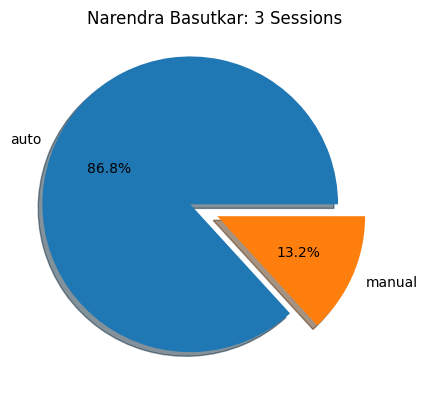

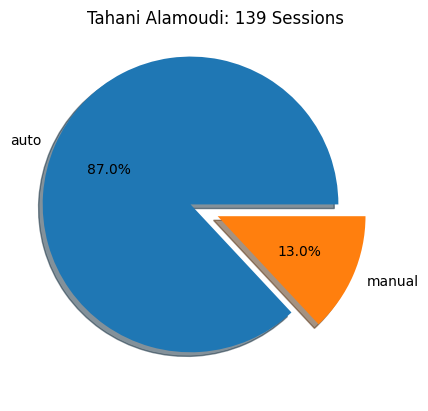

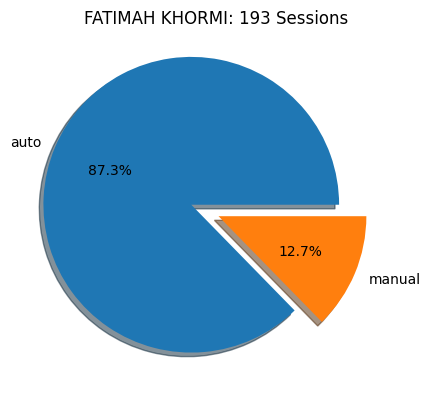

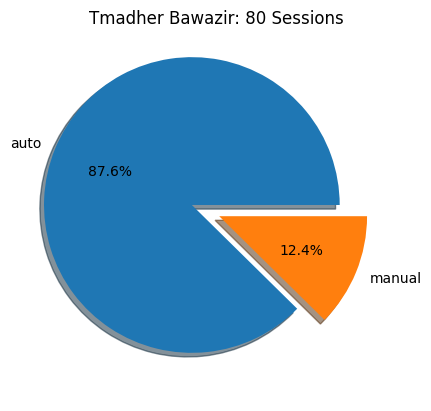

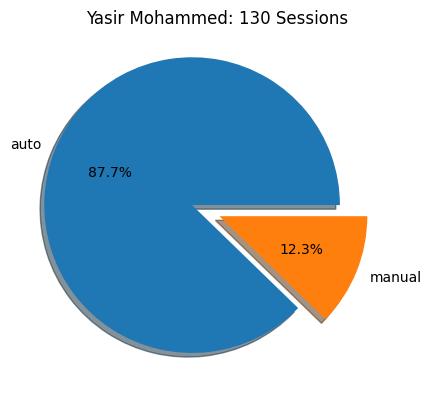

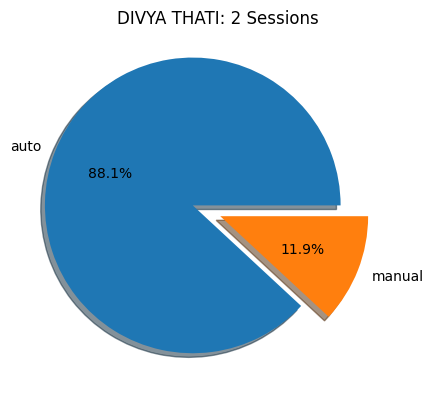

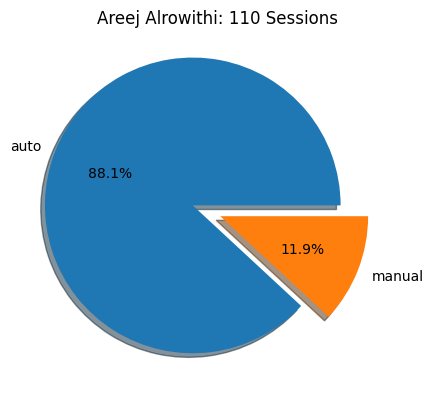

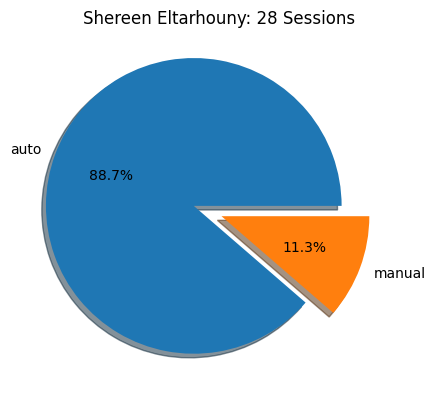

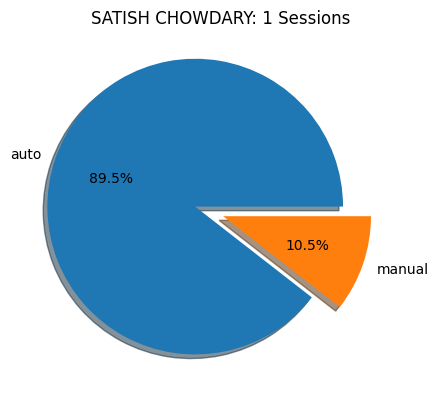

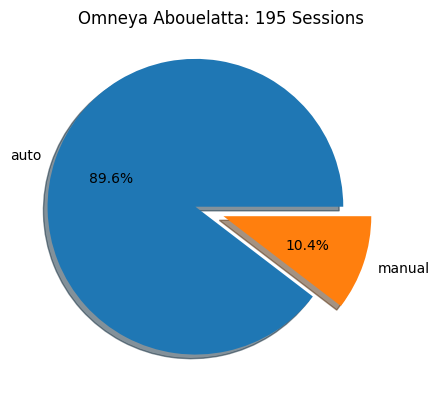

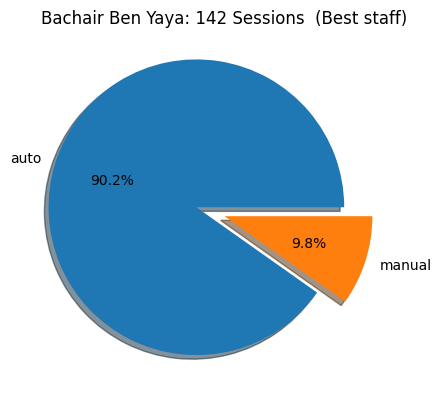

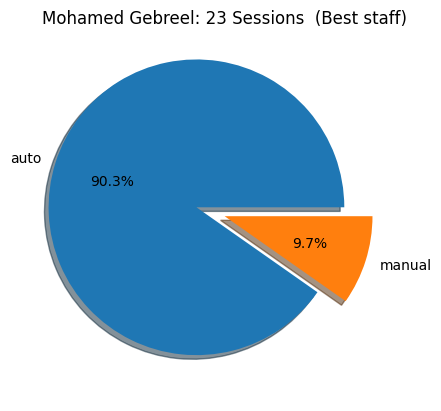

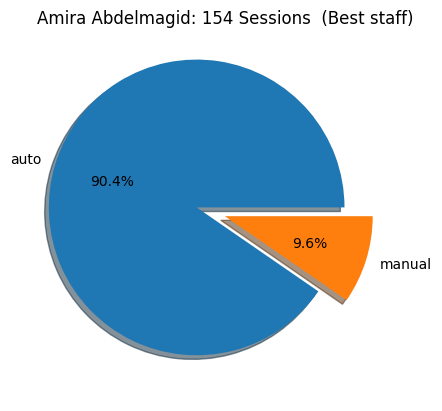

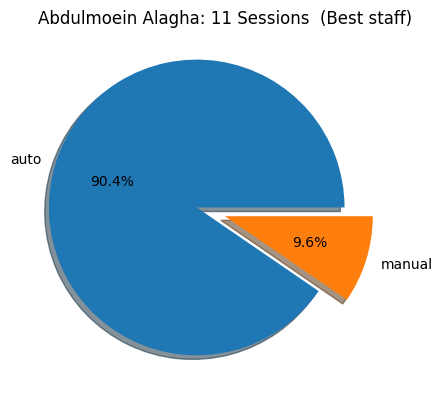

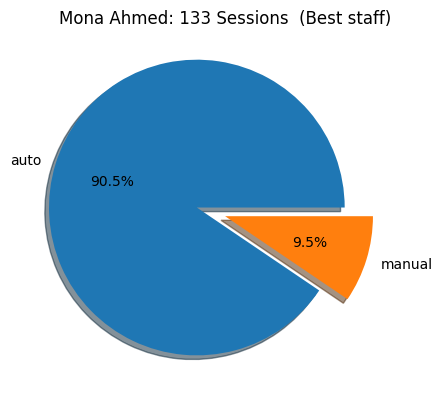

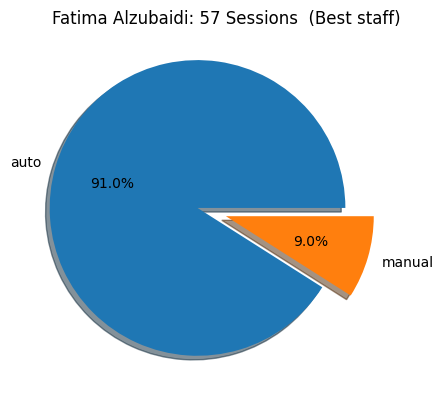

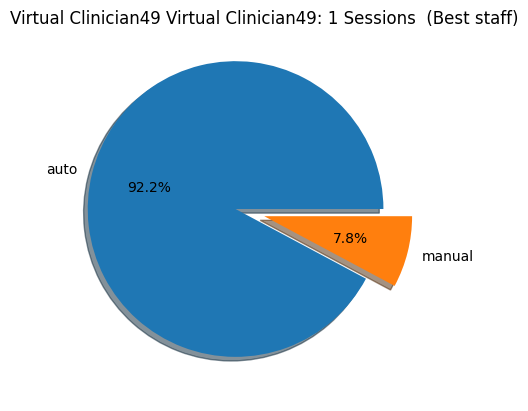

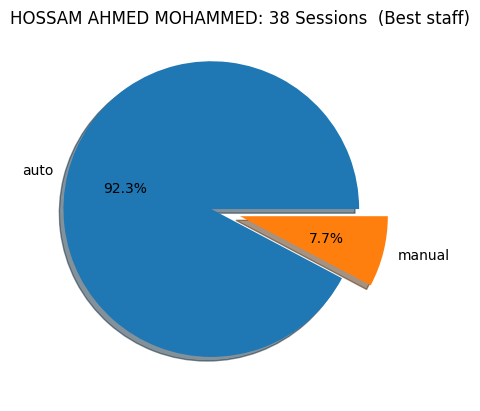

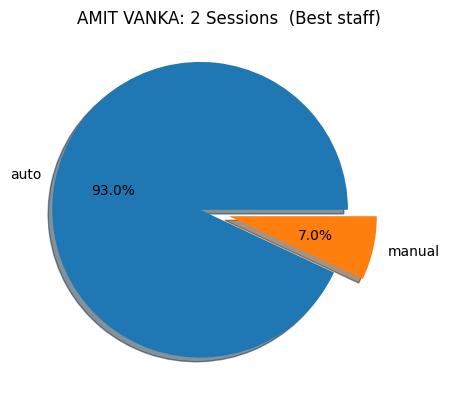

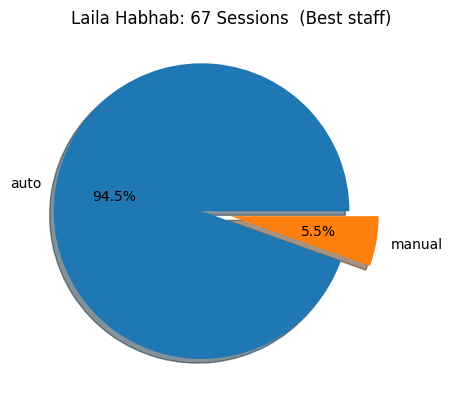

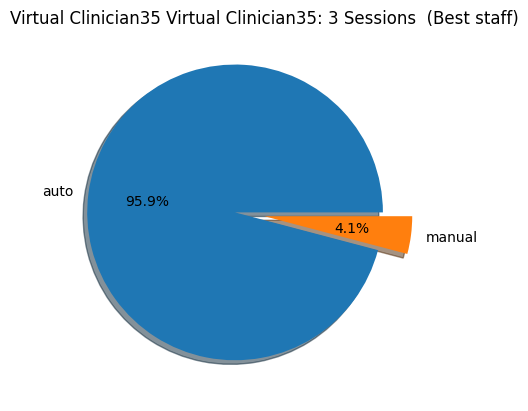

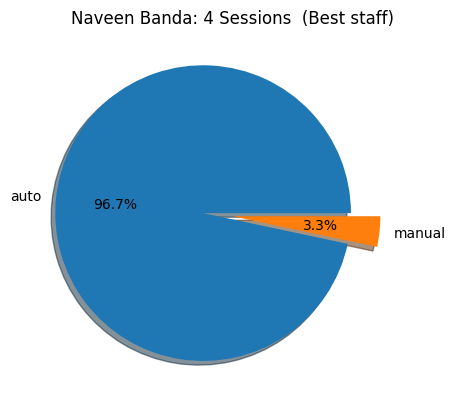

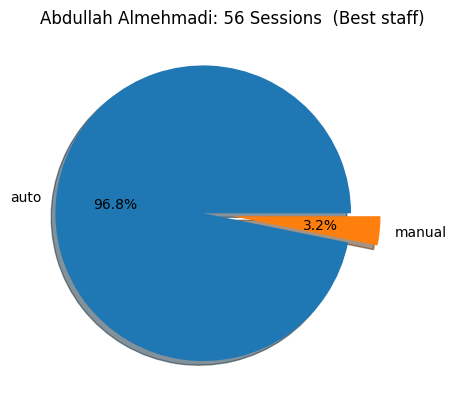

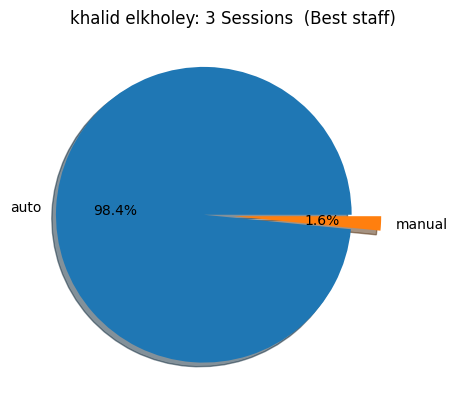

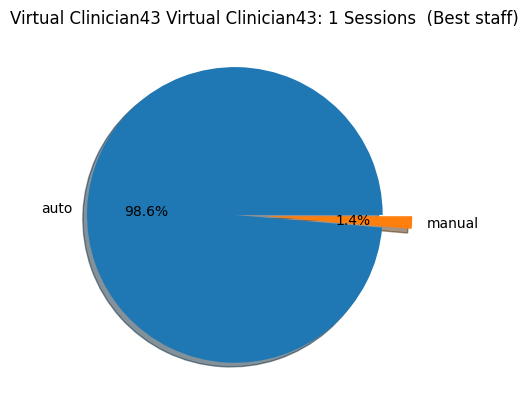

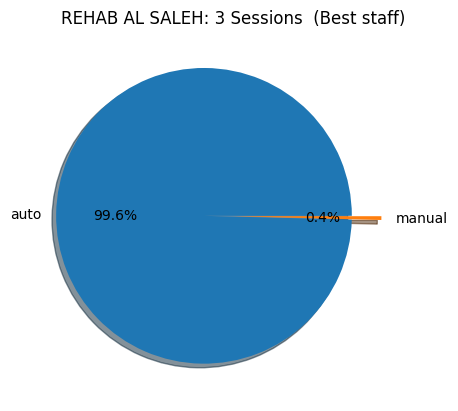

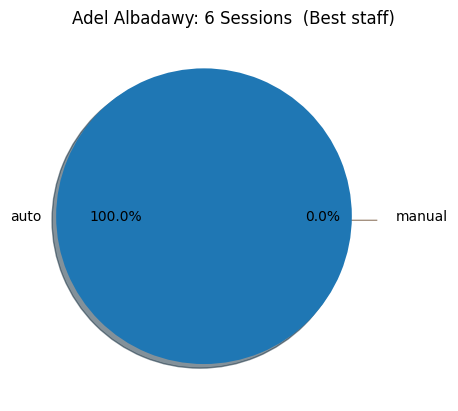

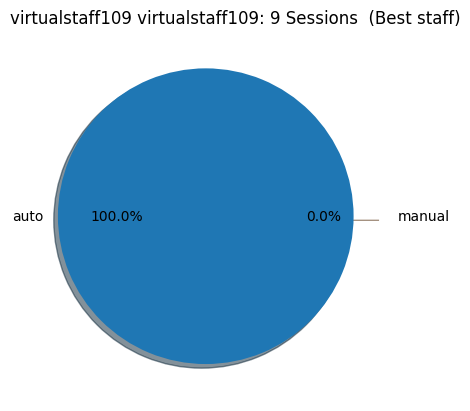

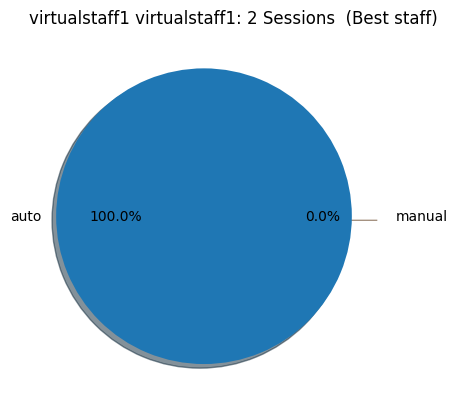

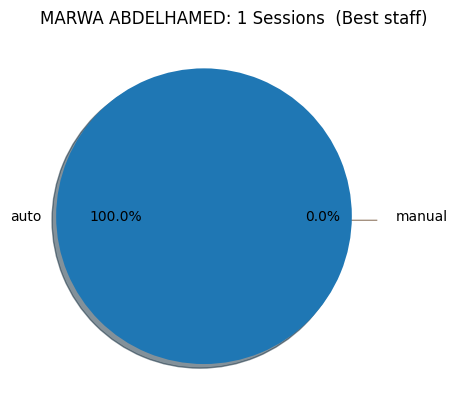

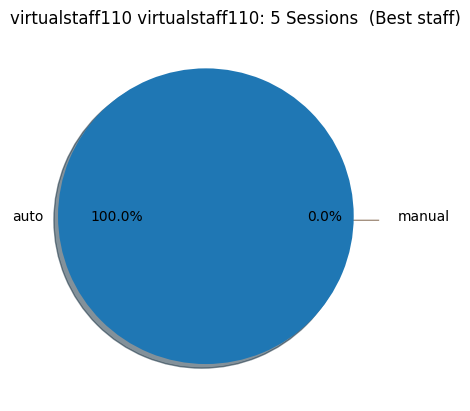

In [18]:
for no ,session in chart_data.iterrows():
    #print(session["Name"])
    if session["per"] >= 90:
        lan=" (Best staff)"
    else:
        lan=""
    mylabels = ["auto", "manual"]
    myexplode = [0.2, 0]
    plt.title(session["Name"]+": "+session["Total_session"]+" Sessions "+lan)
    plt.pie(session["pie_num"],labels = mylabels, explode = myexplode, shadow = True,autopct='%1.1f%%')
    plt.show() 
    print("""
    
    """)